In [35]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
pulsar_train = pd.read_csv("pulsar_data_train.csv")


## Phase 1 && 2

When choosing dataset I was looking for interesting and non trivial classification datasets. 

Let me introduce the one that has drawn my attention - Pulsar Star Dataset. It has 8 numerical dimensions, 1 categorical (predicted class) and 12528 data points. The dimensions are: 
1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class (Classification: Yes or No)

I am going to use SVM model in this project, that is the main reason why I've chosen this dataset. It is a good experience for me to use SVM with PCA. I am also additionally going to use SVM with original data(on chosen dimensions without PCA) and compare the performance of SVM with PCA and without. 

#### Note The original dataset comes with test and train csv files but in this project I am only going to use train file as it has enough data. 

#### Lets explore the data!

In [37]:
# Check the general info
pulsar_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [38]:
pulsar_train.describe()


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [39]:
pulsar_train.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

We can see that there are some null values that we will have to handle.

In our case the best way to handle it is to fill them with median values using pandas.
Filling with the median is a good method because it is less affected by outliers and skewed data than the mean.



In [40]:
# Check the column names
pulsar_train.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [41]:
# Filling the missing values
for column in [" Excess kurtosis of the integrated profile", " Standard deviation of the DM-SNR curve", " Skewness of the DM-SNR curve"]:
    pulsar_train[column].fillna(pulsar_train[column].median(), inplace=True)
pulsar_train.isnull().sum()


 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

Alright, now we are going to actually explore the dimensions of our data set and look for potential features. 
A good way is to check the correlation between them.

In [42]:
pulsar_train.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.551105,-0.804566,-0.737598,-0.298123,-0.299926,0.235781,0.143316,-0.676129
Standard deviation of the integrated profile,0.551105,1.000000,-0.485862,-0.539896,-0.001656,-0.056450,0.031671,0.028343,-0.365757
Excess kurtosis of the integrated profile,-0.804566,-0.485862,1.000000,0.873666,0.384040,0.389458,-0.317187,-0.194234,0.732576
Skewness of the integrated profile,-0.737598,-0.539896,0.873666,1.000000,0.412659,0.408077,-0.328675,-0.198124,0.707086
Mean of the DM-SNR curve,-0.298123,-0.001656,0.384040,0.412659,1.000000,0.760472,-0.616385,-0.345246,0.400375
Standard deviation of the DM-SNR curve,-0.299926,-0.056450,0.389458,0.408077,0.760472,1.000000,-0.765315,-0.527117,0.470739
Excess kurtosis of the DM-SNR curve,0.235781,0.031671,-0.317187,-0.328675,-0.616385,-0.765315,1.000000,0.898749,-0.389788
Skewness of the DM-SNR curve,0.143316,0.028343,-0.194234,-0.198124,-0.345246,-0.527117,0.898749,1.000000,-0.252047
target_class,-0.676129,-0.365757,0.732576,0.707086,0.400375,0.470739,-0.389788,-0.252047,1.000000


<Axes: >

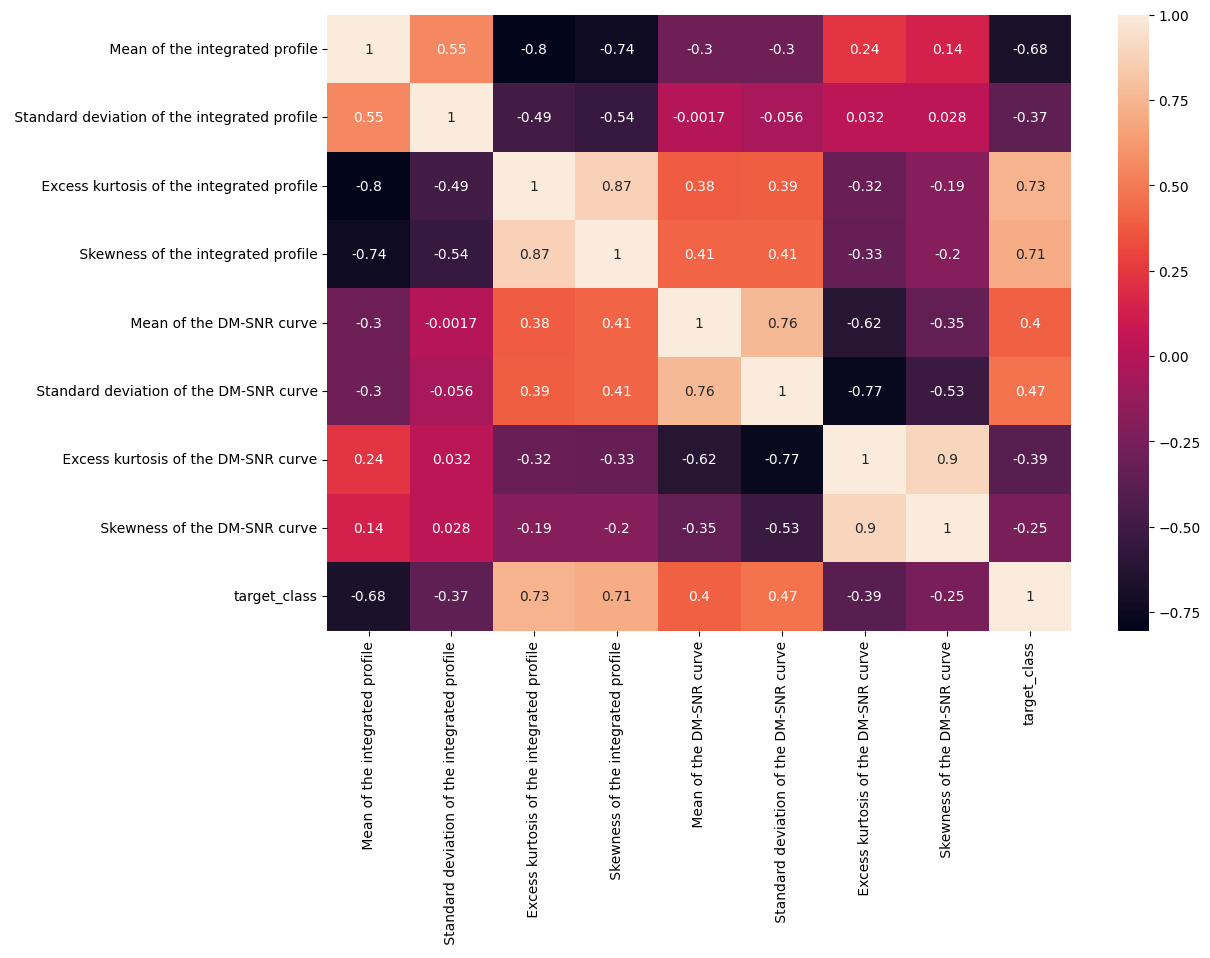

In [43]:
# Lets visualise with a heatmap
plt.subplots(figsize=(12,8))
sns.heatmap(pulsar_train.corr(),annot=True)

In [44]:
# Lets do a Pairplot to check all the dimension (might be quite computationally complex)
features = pulsar_train.columns[:-1]
plt.figure(figsize=(10, 5))

sns.pairplot(pulsar_train, vars=features, hue='target_class')
plt.show()

<Figure size 1000x500 with 0 Axes>

Lets check the dimensions with high correlation to the target.

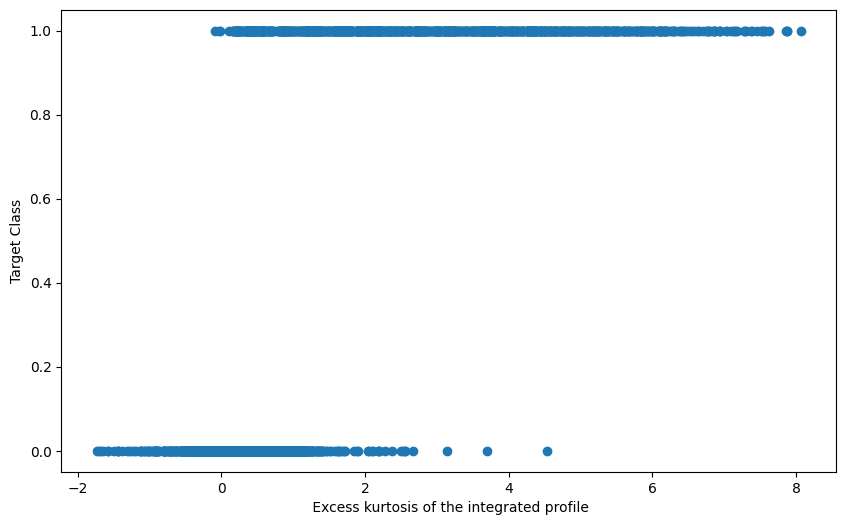

In [45]:
# Plot Excess kurtosis of the integrated profile vs target class
plt.figure(figsize=(10, 6))
plt.scatter(pulsar_train[' Excess kurtosis of the integrated profile'], pulsar_train['target_class'])
plt.xlabel(' Excess kurtosis of the integrated profile')
plt.ylabel('Target Class')
plt.show()

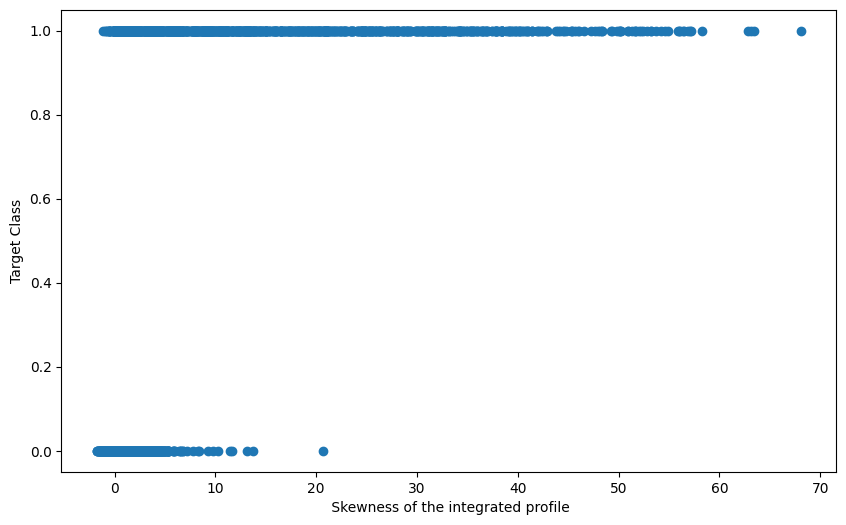

In [46]:
# Plot Skewness of the integrated profile vs target class
plt.figure(figsize=(10, 6))
plt.scatter(pulsar_train[' Skewness of the integrated profile'], pulsar_train['target_class'])
plt.xlabel(' Skewness of the integrated profile')
plt.ylabel('Target Class')
plt.show()

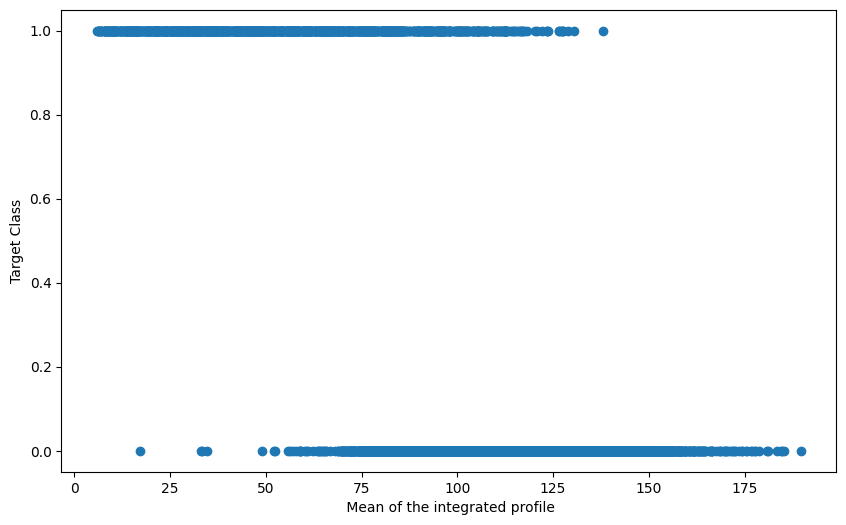

In [47]:

# Plot Mean of the integrated profile vs target class
plt.figure(figsize=(10, 6))
plt.scatter(pulsar_train[' Mean of the integrated profile'], pulsar_train['target_class'])
plt.xlabel(' Mean of the integrated profile')
plt.ylabel('Target Class')
plt.show()

The correlation matrix shows features that are correlated with each other, including the target class. 

If there is a positive correlation, it means that as one variable increases, the other rises as well, and if there is a negative correlation, the other variable falls.

We can see that "Excess kurtosis of the integrated profile" and "Skewness of the integrated profile" have strong positive correlations with the target class (0.732576 and 0.707086, respectively). This implies that they might serve as reliable indicators for finding a pulsar star.

The "Mean of the integrated profile" has a strong negative correlation with the target class (-0.676129). This means that as the mean of the integrated profile increases, it's less likely to be a pulsar star.

Similarly, "Mean of the DM-SNR curve" and "Standard deviation of the DM-SNR curve" are positively correlated with the target class (0.400375 and 0.470739 respectively), suggesting that they might also be good predictors.

- Excess kurtosis of the integrated profile: 0.732576

- Skewness of the integrated profile: 0.707086

- Standard deviation of the DM-SNR curve: 0.470739

- Mean of the DM-SNR curve: 0.400375

- Skewness of the DM-SNR curve: -0.252047

- Excess kurtosis of the DM-SNR curve: -0.389788

- Standard deviation of the integrated profile: -0.365757

- Mean of the integrated profile: -0.676129

#### Strongest correlation is between:

 - Excess kurtosis of the integrated profile

 - Skewness of the integrated profile

 - Mean of the integrated profile


### Lets do another extra step and use Sci-kit Mutual information feature selection to compare the results





In [48]:
# Split into X, y
X = pulsar_train.drop('target_class', axis=1)
y = pulsar_train['target_class']

# Choose 3 best features
selector = SelectKBest(score_func=mutual_info_classif, k=3)
fit = selector.fit(X, y)

indices = np.argsort(fit.scores_)[::-1]

# Get the names of the top 3 features
features = []
for i in range(3):
    features.append(X.columns[indices[i]])

print(features)


[' Skewness of the integrated profile', ' Excess kurtosis of the integrated profile', ' Mean of the integrated profile']


### We can see amazing results here, the dimensions we've choosen using correlation, actually,  match the mutual information selected dimensions!

#### Now, we are going to move to Phase 4 && Phase 5 and we definetely know which dimensions we will be using!
 - Excess kurtosis of the integrated profile

 - Skewness of the integrated profile

 - Mean of the integrated profile

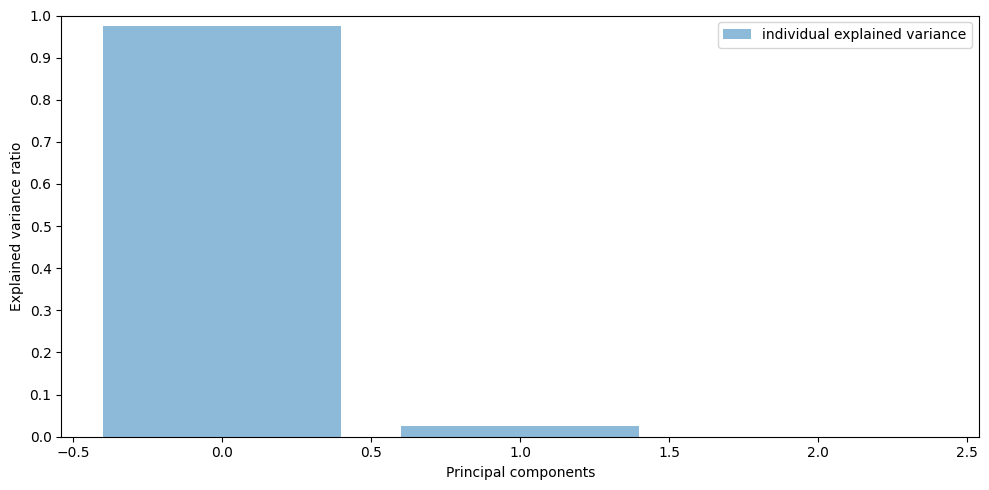

The original data had 3 features. The reduced data has 3 features.


In [49]:
df = pulsar_train
features = [' Mean of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile'] 

X = df[features]

scaler = StandardScaler()
x_scaled = scaler.fit(X)

# Perform PCA
pca = PCA(n_components=len(features))
pca_result = pca.fit_transform(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance for each principal component
plt.figure(figsize=(10, 5))
plt.bar(range(len(features)), explained_variance, alpha=0.5,
        align='center', label='individual explained variance')
plt.ylim(0, 1)  
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# Show shape of the reduced dataset
print(f"The original data had {X.shape[1]} features. The reduced data has {pca_result.shape[1]} features.")

In [50]:
# Print explained variance
for i, exp_var in enumerate(explained_variance):
    print(f"Principal Component {i} explains {exp_var*100:.2f}% of the variance.")

Principal Component 0 explains 97.52% of the variance.
Principal Component 1 explains 2.46% of the variance.
Principal Component 2 explains 0.03% of the variance.


### Lets perform some visualisations 

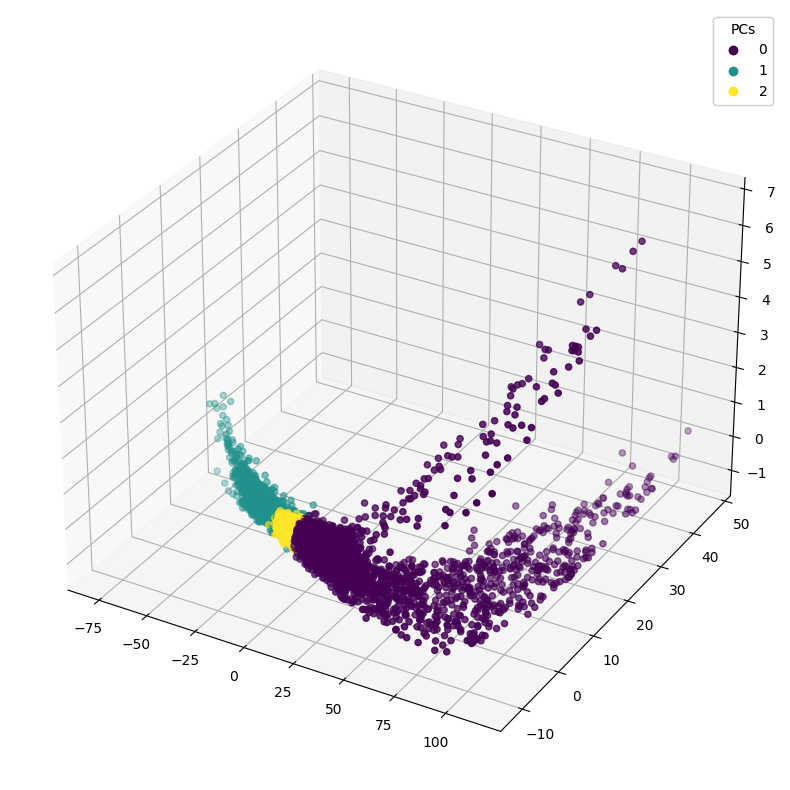

In [51]:
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

colors = np.argmax(df_pca.values, axis=1)

# 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=colors)

legend1 = ax.legend(*scatter.legend_elements(), title="PCs")
ax.add_artist(legend1)

plt.show()


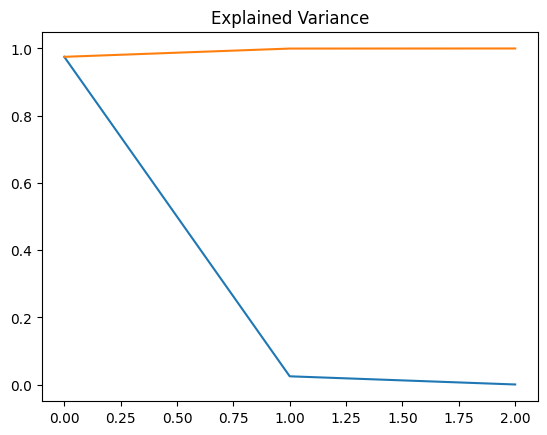

In [52]:
plt.plot(range(3), pca.explained_variance_ratio_) 
plt.plot(range(3), np.cumsum(pca.explained_variance_ratio_)) 
plt.title("Explained Variance") 
plt.show()

### Lets look from different side

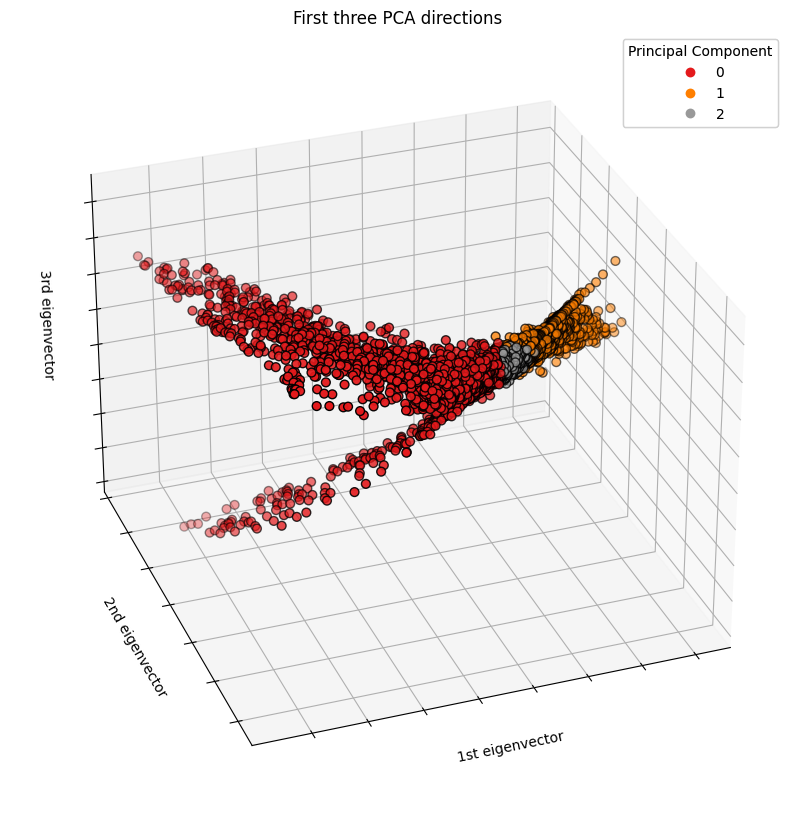

In [53]:
# Create color map based on which component is highest for each point
colors = np.argmax(pca_result, axis=1)

fig = plt.figure(1, figsize=(10, 15))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=colors,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Principal Component")
ax.add_artist(legend1)

plt.show()


It is obviously seen that PC1 explains the most of variance (97.51%), PC2 only (2.46%) and PC3 explains only (0.03%).
The PC3 only contributes a tiny bit of information to our dataset. Without suffering a significant loss of information, it would probably be fair to ignore it in the majority of circumstances. However, in our case for the purpose of this project we are going to keep it in the further steps.


In [54]:
y = pulsar_train['target_class']

X_train, X_test, y_train, y_test = train_test_split(pca_result, y, test_size=0.3, random_state=42)

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:", metrics.precision_score(y_test, y_pred))

print("Recall:", metrics.recall_score(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9723330673051344
Precision: 0.9844357976653697
Recall: 0.71671388101983
[[3402    4]
 [ 100  253]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3406
         1.0       0.98      0.72      0.83       353

    accuracy                           0.97      3759
   macro avg       0.98      0.86      0.91      3759
weighted avg       0.97      0.97      0.97      3759



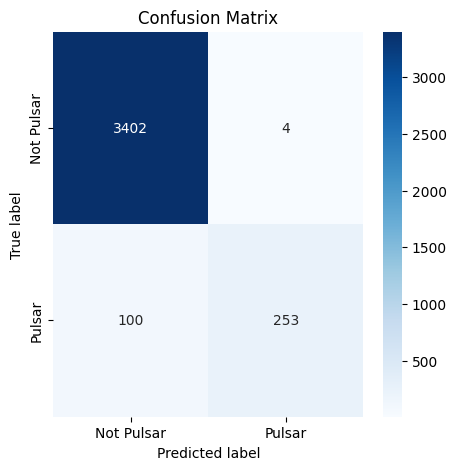

In [55]:
cm = confusion_matrix(y_test, y_pred)

labels = ['Not Pulsar', 'Pulsar']

cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

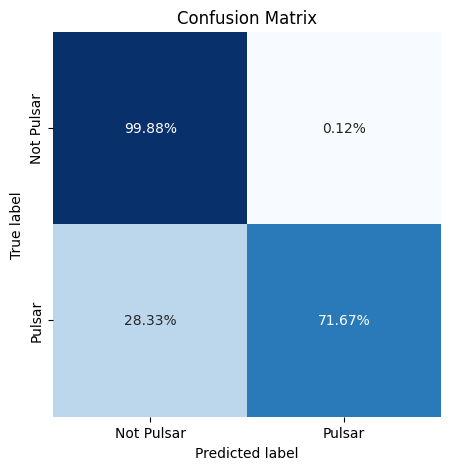

              precision    recall  f1-score   support

  Not Pulsar       0.97      1.00      0.98      3406
      Pulsar       0.98      0.72      0.83       353

    accuracy                           0.97      3759
   macro avg       0.98      0.86      0.91      3759
weighted avg       0.97      0.97      0.97      3759



In [56]:
cm = confusion_matrix(y_test, y_pred)

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels = ['Not Pulsar', 'Pulsar']

cm_df = pd.DataFrame(cm_norm, index=labels, columns=labels)


plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(y_test, y_pred, target_names=labels))


Report shows that our model is quite good at detecting "Not Pulsar" stars, but less efficient (but still good!) with "Pulsar" stars, as evidenced by the fact that the recall for the "Pulsar" class is much lower. However, the total performance (accuracy) is fairly strong at (97%).

Next we are going to train SVM on originally choosen features: 
- Excess kurtosis of the integrated profile

- Skewness of the integrated profile

- Mean of the integrated profile


In [57]:
features = [' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the integrated profile']
X = pulsar_train[features]
y = pulsar_train['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = svm.SVC(kernel='linear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9720670391061452
Precision: 0.9875776397515528
Recall: 0.7004405286343612
[[2277    2]
 [  68  159]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2279
         1.0       0.99      0.70      0.82       227

    accuracy                           0.97      2506
   macro avg       0.98      0.85      0.90      2506
weighted avg       0.97      0.97      0.97      2506



As we can see the models are almost the same in performance. However, Recall appears to have been slightly improved by the PCA model. 

### Conclusion
I did a very interesting project which gave me a good experience of working with PCA and combing it with SVM. Using both models might be a challenge in some cases as PCA and SVM both directly not interpratable.

The dimension were chosen after exploring and analysing the dataset very carefully. The corelation and Mutual information methods showed the same results. I believe the best dimensions were chosen. The further experimenting is possible with expanding the number of dimensions as there were some more related dimensions.  

All in all, it was a very good experience and I will definitely use PCA in the future as it showed(even though very slightly in my case) that it can increase the model performance. 